### Gather data:
Firstly, we are going to import wget and requests python modules to gather data using either of the modules. 

In [1]:
import requests as re
import wget
import csv
import os
import pandas as pd
import json
import tweepy
import numpy as np

In [9]:
# Download neural network tsv file
url1 = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
if os.path.exists('../datasets/image-predictions.tsv'):
    print('File exists:',os.path.isfile('../datasets/image-predictions.tsv'))
else:
    wget.download(url1, '../datasets')

File exists: True


In [13]:
# Download twitter archive csv file
url_twitterarchive = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv"
# response = re.get(url_twitterarchive)

In [14]:
if os.path.exists('../datasets/twitter-archive-enhanced.csv'):
    print('File exists:',os.path.isfile('../datasets/twitter-archive-enhanced.csv'))
else:
    df_dummy = pd.read_csv(url_twitterarchive)
    df_dummy.to_csv('../datasets/twitter-archive-enhanced.csv')

File exists: True


Looks like we have downloaded the two necessary files for this project. Let's peak into the data/ folder to verify. 

In [15]:
for ifile in os.listdir('../datasets/'):
    print (ifile)

tweet-json.txt
twitter-archive-enhanced.csv
image-predictions.tsv


***

### Assess data:
Let's load the twitter data and start assessing the data for `Quality` and `Tidiness`.

In [35]:
df_tae = pd.read_csv('../datasets/twitter-archive-enhanced.csv')
df_tae.source[0]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [36]:
df_tae.shape

(2356, 18)

Firstly, let's look in if the column names are descriptive of the data.

In [37]:
# Column names one-by-one
for icol in list(df_tae.columns):
    print(icol)

Unnamed: 0
tweet_id
in_reply_to_status_id
in_reply_to_user_id
timestamp
source
text
retweeted_status_id
retweeted_status_user_id
retweeted_status_timestamp
expanded_urls
rating_numerator
rating_denominator
name
doggo
floofer
pupper
puppo


Looks like the columns are descriptive of the data (at this point of time we neglect the missing data). Moving further, let's see what are the datatypes of each feature in the dataset.

In [38]:
# Datatypes of each column
df_tae.dtypes

Unnamed: 0                      int64
tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

Hmm... datatypes of different columns aren't making sense for some. Let's list them out here first. Later, we can add specific changes needed to the `Quality` table.

That's it! every other datatype looks in sync. Let's handle the duplicated rows, if any ? 

In [39]:
# Duplicated tweet_ids
dup_rows = sum(df_tae['tweet_id'].duplicated())
print ('There are {} duplicated rows in the dataset.'.format(dup_rows))

There are 0 duplicated rows in the dataset.


 Let's first get an overview of missing values in the complete dataset and then, we can list missing values in each column.

In [40]:
# Missing values overview
df_tae.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
Unnamed: 0                    2356 non-null int64
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         235

There are 2356 total entries (rows) in the dataset.

In [41]:
missing_value_cols = ['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp','expanded_urls'] 
for imis in missing_value_cols:
    print('Column name:',imis,' >>> No. of Nans are:',sum(df_tae[imis].isnull()))

Column name: in_reply_to_status_id  >>> No. of Nans are: 2278
Column name: in_reply_to_user_id  >>> No. of Nans are: 2278
Column name: retweeted_status_id  >>> No. of Nans are: 2175
Column name: retweeted_status_user_id  >>> No. of Nans are: 2175
Column name: retweeted_status_timestamp  >>> No. of Nans are: 2175
Column name: expanded_urls  >>> No. of Nans are: 59


In [42]:
df_tae.text.value_counts(dropna=False)

This is Layla. She's giving you a standing ovation.13/10 just magnificent (vid by @CSBrzezinski) https://t.co/KxYXHUHUi2                                               1
Very fit horned dog here. Looks powerful. Not phased by wind. Great beard. Big enough to ride? 6/10 would cuddle https://t.co/wwwYO9C9kl                               1
This is Luca. He got caught howling. H*ckin embarrassed. 12/10 https://t.co/r8DxA8DYJ2                                                                                 1
This is Monkey. She's supporting owners everywhere with her fancy #PrideMonth bandana. 13/10 love is love is love... https://t.co/lUcpnZDPz9                           1
For those who claim this is a goat, u are wrong. It is not the Greatest Of All Time. The rating of 5/10 should have made that clear. Thank u                           1
                                                                                                                                                           

In [43]:
df_tae.source.value_counts(dropna=False)

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [44]:
df_tae.rating_numerator.value_counts(dropna=False)

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [45]:
df_tae.rating_denominator.value_counts(dropna=False)

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [46]:
df_tae.name.value_counts(dropna=False)

None         745
a             55
Charlie       12
Cooper        11
Oliver        11
            ... 
Apollo         1
Hubertson      1
Hazel          1
Gabby          1
Doobert        1
Name: name, Length: 957, dtype: int64

In [47]:
df_tae.columns

Index(['Unnamed: 0', 'tweet_id', 'in_reply_to_status_id',
       'in_reply_to_user_id', 'timestamp', 'source', 'text',
       'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [48]:
display(df_tae.doggo.value_counts()['doggo'])
display(df_tae.floofer.value_counts()['floofer'])
display(df_tae.pupper.value_counts()['pupper'])
display(df_tae.puppo.value_counts()['puppo'])

97

10

257

30

In [49]:
df_tae.shape

(2356, 18)

### Imagine predictions tsv file

In [50]:
df_nn = pd.read_csv('../datasets/image-predictions.tsv', sep='\t')
display(df_nn.shape)
df_nn.head()

(2075, 12)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [51]:
df_nn.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [52]:
df_nn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [53]:
df_nn.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

### tweet_json.txt file

In [55]:
data = []
with open('../datasets/tweet-json.txt', 'r') as readfile: 
    tweet_json = readfile.readline()
    while tweet_json:
        tweet_dict = json.loads(tweet_json)
        data.append(tweet_dict)
        tweet_json = readfile.readline()
        
df_tjson = pd.DataFrame.from_dict(data)

In [58]:
display(df_tjson.shape)
df_tjson.head()

(2354, 31)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,False,False,en,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,False,False,en,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,False,False,en,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,False,False,en,NaN,NaN,NaN,NaN


In [59]:
df_tjson.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status'],
      dtype='object')

In [60]:
df_tjson.dtypes

created_at                        object
id                                 int64
id_str                            object
full_text                         object
truncated                           bool
display_text_range                object
entities                          object
extended_entities                 object
source                            object
in_reply_to_status_id            float64
in_reply_to_status_id_str         object
in_reply_to_user_id              float64
in_reply_to_user_id_str           object
in_reply_to_screen_name           object
user                              object
geo                               object
coordinates                       object
place                             object
contributors                      object
is_quote_status                     bool
retweet_count                      int64
favorite_count                     int64
favorited                           bool
retweeted                           bool
possibly_sensiti

In [61]:
df_tjson.retweet_count.sort_values(ascending=False)

1037    79515
533     56625
259     56625
1077    52360
816     52360
        ...  
112         3
341         3
273         3
1293        2
290         0
Name: retweet_count, Length: 2354, dtype: int64

In [62]:
df_tjson.favorite_count.sort_values(ascending=False)

412     132810
1037    131075
65      107956
533     107015
134     106827
         ...  
909          0
588          0
164          0
585          0
484          0
Name: favorite_count, Length: 2354, dtype: int64

### Clean data:

#### Duplicate dataframes

In [118]:
df_tae_clean = df_tae.copy()
df_nn_clean = df_nn.copy()
df_tjson_clean = df_tjson.copy()
display(df_tae_clean.shape)
display(df_nn_clean.shape)
display(df_tjson_clean.shape)

(2356, 18)

(2075, 12)

(2354, 31)

#### Define

tweet_id, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id all these columns should be of 'string' datatype (as we are never going to perform any analysis on these id's). Instead some are 'integers' and many 'floats'.

#### Code

In [119]:
list_tids = ['tweet_id','in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id']
for tid in list_tids:
    print(df_tae_clean[tid].dtype == 'object')
    df_tae_clean[tid] = df_tae_clean[tid].astype('object')

False
False
False
False
False


#### Test

In [120]:
for tid in list_tids:
    print(df_tae_clean[tid].dtype == 'object')

True
True
True
True
True


#### Define

timestamp and retweeted_timestamp are given as object datatypes; wherein they should actually be of timestamp datatype.

#### Code

In [121]:
list_tids = ['timestamp','retweeted_status_timestamp']
for tid in list_tids:
    print(df_tae_clean[tid].dtype == 'datetime64[ns]')
    df_tae_clean[tid] = df_tae_clean[tid].astype('datetime64[ns]')

False
False


#### Test

In [122]:
for tid in list_tids:
    print(df_tae_clean[tid].dtype == 'datetime64[ns]')

True
True


#### Define

Of the 17 different column data, 6 columns (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp) correspond to retweet data. Let's look at how many retweets occur. If there are any, we should remove those rows. 

#### Code

In [123]:
df_tae_clean = df_tae_clean[df_tae_clean.retweeted_status_timestamp.isna()]

#### Test

In [124]:
sum(df_tae_clean.retweeted_status_timestamp.notnull() == True)

0

#### Define

Source column with weblinks shouldn't have the HTML tags ```<a href= ""> <\a>```

#### Code

In [125]:
df_tae_clean['source'] = df_tae_clean.source.str.extract(r'href="(.+?)"')

#### Test

In [126]:
df_tae_clean.head()

,Unnamed: 0,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### Define

Missing expanded urls have to be fixed appropriately.

#### Code

In [127]:
expanded_str = 'https://twitter.com/dog_rates/status/{}/photo/1'
df_tae_clean.expanded_urls = expanded_str.format(df_tae_clean.tweet_id[0])
df_tae_clean.head()

,Unnamed: 0,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Tilly,None,None,None,None
2,2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,12,10,Archie,None,None,None,None
3,3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Darla,None,None,None,None
4,4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,12,10,Franklin,None,None,None,None


#### Test

In [128]:
df_tae_clean.expanded_urls.notnull().all()

True

#### Define

There are about 745 that are missing from name column. Additionally, some dog names might have been misinterpreted as 'a','an','the' or 'None'.

#### Code

In [129]:
df_tae_clean.name.replace(['a','an','the','None'], np.nan, inplace=True)

#### Test

In [130]:
df_tae_clean.name.isin(['a','an','the','None']).all()

False

#### Define

Avoid weblinks in the text column. 

#### Code

In [131]:
df_tae_clean.text = df_tae_clean.text.str.replace(r'https\S+', '')

#### Test

In [132]:
df_tae_clean.text.str.find(r'https').any()

True

#### Define

Three of the information columns needed (id, retweet_count, favorite_count) look clean. I have used the data from no Twitter account part of the project.

#### Code

In [133]:
df_nn.tweet_id.dtype
df_nn.tweet_id = df_nn.tweet_id.astype('object') 

#### Test

In [137]:
df_nn.tweet_id.dtype

dtype('O')

#### Test

In [138]:
df_tjson = df_tjson.rename(columns={'id_str':'tweet_id'})
df_tjson.head()

,created_at,id,tweet_id,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,False,False,en,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,False,False,en,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,False,False,en,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,False,False,en,NaN,NaN,NaN,NaN


#### Define

Merge tweet_json and image_predictions to be part of twitter_archive table.

In [139]:
display(df_tae_clean.shape)
display(df_nn_clean.shape)
display(df_tjson_clean.shape)

(2175, 18)

(2075, 12)

(2354, 31)

In [140]:
df_nn_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [141]:
df_tjson3 = df_tjson_clean[['id','retweet_count','favorite_count']]
df_tjson3.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [142]:
df_clean = df_tjson3.merge(df_nn_clean, left_on='id', right_on='tweet_id', how='outer')
df_clean = df_clean.merge(df_tae_clean, left_on='id', right_on='tweet_id', how='outer')
df_clean.drop(['tweet_id_x','img_num','Unnamed: 0'], axis=1, inplace=True)
df_clean.columns

Index(['id', 'retweet_count', 'favorite_count', 'jpg_url', 'p1', 'p1_conf',
       'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog',
       'tweet_id_y', 'in_reply_to_status_id', 'in_reply_to_user_id',
       'timestamp', 'source', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [143]:
# Save clean dataset to master csv file
df_clean.to_csv('../datasets/twitter-archive-master.csv')

## Data Visualization:

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Loading Cleaned data
Cleaned dataset `twitter-archive-master.csv` is loaded from the **datasets/** folder. 

In [3]:
df_visu  = pd.read_csv('../datasets/twitter-archive-master.csv')
display(df_visu.shape)
df_visu.drop('Unnamed: 0', axis=1, inplace=True)
df_visu.head()

(2356, 31)

,id,retweet_count,favorite_count,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,...,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,8.924206e+17,8853.0,39467.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,bagel,0.085851,False,...,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None
1,8.921774e+17,6514.0,33819.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,Pekinese,0.090647,True,...,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Tilly,None,None,None,None
2,8.918152e+17,4328.0,25461.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,malamute,0.078253,True,...,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,12.0,10.0,Archie,None,None,None,None
3,8.916896e+17,8964.0,42908.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,...,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Darla,None,None,None,None
4,8.913276e+17,9774.0,41048.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,English_springer,0.225770,True,...,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,12.0,10.0,Franklin,None,None,None,None


Let's first look at different columns and see what interesting observations we can make from the dataset. 

In [4]:
df_visu.columns

Index(['id', 'retweet_count', 'favorite_count', 'jpg_url', 'p1', 'p1_conf',
       'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog',
       'tweet_id_y', 'in_reply_to_status_id', 'in_reply_to_user_id',
       'timestamp', 'source', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [5]:
print("No. of unique user are:",df_visu.id.nunique())

No. of unique user are: 2354


Let's dig into the favorite count column and find out top5 users.

In [6]:
df_favorder = df_visu.sort_values(by=['favorite_count'], ascending=False)
df_favorder[['favorite_count','retweet_count']].dtypes

favorite_count    float64
retweet_count     float64
dtype: object

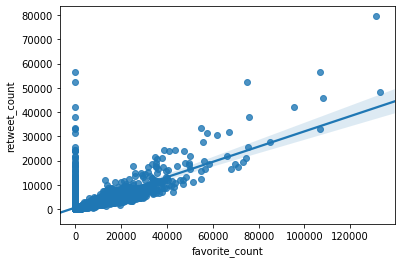

In [7]:
sns.regplot(data=df_favorder, x='favorite_count', y='retweet_count');

In [29]:
df_p1 = df_visu.groupby(['p1']).size().sort_values(ascending=False)
df_p1 = df_p1[df_p1 > 50].reset_index()
df_p1

,p1,0
0,golden_retriever,150
1,Labrador_retriever,100
2,Pembroke,89
3,Chihuahua,83
4,pug,57


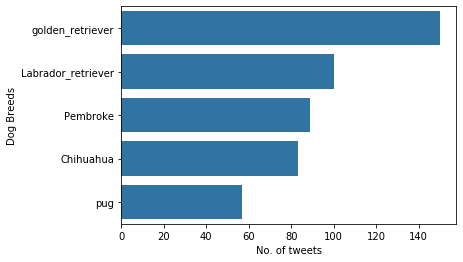

In [44]:
base_color = sns.color_palette()[0]
sns.barplot(data = df_p1, y = 'p1', x=0, color=base_color);
plt.ylabel('Dog Breeds');
plt.xlabel('No. of tweets');
#plt.xticks(rotation=90);

In [51]:
df_name = df_visu.groupby(['name']).size().sort_values(ascending=False)
df_name = df_name[df_name > 6].reset_index()
df_name

,name,0
0,Charlie,11
1,Lucy,11
2,Cooper,10
3,Oliver,10
4,Penny,9
5,Tucker,9
6,Sadie,8
7,Winston,8
8,Lola,8
9,Toby,7


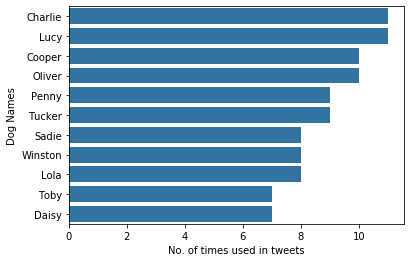

In [53]:
base_color = sns.color_palette()[0]
sns.barplot(data = df_name, y = 'name', x=0, color=base_color);
plt.ylabel('Dog Names');
plt.xlabel('No. of times used in tweets');

In [69]:
df_rate = df_visu.melt['doggo', 'floofer', 'pupper', 'puppo','name']]
df_rate.head()

,doggo,floofer,pupper,puppo,name,variable,value
0,None,None,None,None,Phineas,id,8.92421e+17
1,None,None,None,None,Tilly,id,8.92177e+17
2,None,None,None,None,Archie,id,8.91815e+17
3,None,None,None,None,Darla,id,8.9169e+17
4,None,None,None,None,Franklin,id,8.91328e+17
